# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.__version__

'1.1.3'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [3]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [4]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [5]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [6]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [7]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [8]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [11]:
len(movies)

244914

### List all Batman movies ever made

In [12]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [13]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [14]:
batman_df.sort_values(by=['year'], ascending=True).head(15)

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [15]:
harry_df = movies[movies['title'].str.contains("Harry Potter", case=False)]
print("Num of Harry Potter films: ", len(harry_df))
harry_df.sort_values('year', ascending=False)

Num of Harry Potter films:  8


,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
109213,Harry Potter and the Half-Blood Prince,2009
50581,Harry Potter and the Order of the Phoenix,2007
187926,Harry Potter and the Goblet of Fire,2005
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
223087,Harry Potter and the Sorcerer's Stone,2001


### How many movies were made in the year 2017?

In [16]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [17]:
len(movies[movies['year'] == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [18]:
sorted_by_year = movies.set_index('year').sort_index()
sorted_by_year.loc['2000': '2018'].count()

title    114070
dtype: int64

### Section I - Q4: How many movies are titled "Hamlet"?

In [19]:
sorted_by_year[sorted_by_year['title'] == "Hamlet"].count()

title    20
dtype: int64

### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [20]:
tmp = sorted_by_year.loc['2000':]
hamlet_by_year = tmp[tmp['title'] == "Hamlet"]
hamlet_by_year

,title
year,
2000,Hamlet
2009,Hamlet
2011,Hamlet
2014,Hamlet
2015,Hamlet
2016,Hamlet
2017,Hamlet


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [21]:
inception_cast = cast[cast['title'] == "Inception"]
support_cast = inception_cast[inception_cast['n'].isna() == True]
support_cast

,title,year,name,type,character,n
98153,Inception,2010,Michael (III) August,actor,LAX Passenger,NaN
197877,Inception,2010,Ken Bhan,actor,Mombasan Gambler,NaN
374661,Inception,2010,John Ceallach,actor,LAX Passenger,NaN
497161,Inception,2010,Garvin Cross,actor,Snow Commander,NaN
684098,Inception,2010,Seve Esposito,actor,Italian Gambler,NaN
690634,Inception,2010,Marcus (II) Everett,actor,Stock Broker,NaN
707642,Inception,2010,Zachary Christopher Fay,actor,Extra,NaN
836295,Inception,2010,Daniel Girondeaud,actor,Bridge Sub Con,NaN
1006636,Inception,2010,Andrew Hoagland,actor,Pedestrian,NaN
1095095,Inception,2010,Charles Jarrell,actor,Hotel Guest,NaN


In [22]:
len(support_cast)
series_support = inception_cast['n'].isna()
count = 0
for val in series_support:
    if(val == True):
        count += 1
print(count)

27


### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [23]:
main_cast = inception_cast['n'].dropna()
len(main_cast)

51

### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [24]:

inception_cast.sort_values(by='n', inplace=True, na_position='last', ignore_index=True)
inception_cast.head(10)

<ipython-input-24-46f8fc880236>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inception_cast.sort_values(by='n', inplace=True, na_position='last', ignore_index=True)


,title,year,name,type,character,n
0,Inception,2010,Leonardo DiCaprio,actor,Cobb,1.0
1,Inception,2010,Joseph Gordon-Levitt,actor,Arthur,2.0
2,Inception,2010,Ellen Page,actress,Ariadne,3.0
3,Inception,2010,Tom Hardy,actor,Eames,4.0
4,Inception,2010,Ken Watanabe,actor,Saito,5.0
5,Inception,2010,Dileep Rao,actor,Yusuf,6.0
6,Inception,2010,Cillian Murphy,actor,Robert Fischer,7.0
7,Inception,2010,Tom Berenger,actor,Browning,8.0
8,Inception,2010,Marion Cotillard,actress,Mal,9.0
9,Inception,2010,Pete Postlethwaite,actor,Maurice Fischer,10.0


In [25]:
character_series = cast[cast['character'].str.contains('Albus Dumbledore', case=False)]['title']
character_series

704984                                       Epic Movie
792419     Harry Potter and the Deathly Hallows: Part 1
792420     Harry Potter and the Deathly Hallows: Part 2
792421              Harry Potter and the Goblet of Fire
792422           Harry Potter and the Half-Blood Prince
792423        Harry Potter and the Order of the Phoenix
792424         Harry Potter and the Prisoner of Azkaban
947789          Harry Potter and the Chamber of Secrets
947790            Harry Potter and the Sorcerer's Stone
1685537                           Ultimate Hero Project
1893421    Harry Potter and the Deathly Hallows: Part 1
2248085                                          Potter
Name: title, dtype: object

In [26]:
character_df = cast[cast['character'].str.contains('Albus Dumbledore', case=False)]
actors_name = character_df[['name', 'character']].drop_duplicates()
actors_name

,name,character
704984,Dane Farwell,Albus Dumbledore
792419,Michael Gambon,Professor Albus Dumbledore
792421,Michael Gambon,Albus Dumbledore
947789,Richard Harris,Albus Dumbledore
1685537,George (X) O'Connor,Albus Dumbledore
1893421,Toby Regbo,Young Albus Dumbledore
2248085,Timothy Tedmanson,Albus Dumbledore


### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [27]:
keanu_roles = cast[cast['name'] == 'Keanu Reeves']
main_roles = keanu_roles.set_index('year').sort_index().dropna()
keanu_roles.set_index('year').sort_index()

,title,name,type,character,n
year,,,,,
1985,One Step Away,Keanu Reeves,actor,Ron Petrie,1.0
1986,Youngblood,Keanu Reeves,actor,Heaver,12.0
1986,River's Edge,Keanu Reeves,actor,Matt,2.0
1986,Flying,Keanu Reeves,actor,Tommy Warneki,3.0
1988,The Prince of Pennsylvania,Keanu Reeves,actor,Rupert Marshetta,2.0
...,...,...,...,...,...
2017,SPF-18,Keanu Reeves,actor,Keanu Reeves,NaN
2017,To the Bone,Keanu Reeves,actor,Dr. Beckham,11.0
2017,John Wick: Chapter 2,Keanu Reeves,actor,John Wick,1.0


In [28]:
len(main_roles)

58

### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [29]:
sorted_cast_by_year = cast.set_index('year').sort_index()
sorted_cast_by_year

total = sorted_cast_by_year.loc['1950' : '1960']['type'].count()
print("total roles available was", total)

total roles available was 234635


In [30]:
sorted_cast_from_50to60 = sorted_cast_by_year.loc['1950' : '1960']
actors_1950_1960 = sorted_cast_from_50to60[sorted_cast_from_50to60['type'] == 'actor']
len(actors_1950_1960)

171302

In [31]:
#actors_1950_1960
actress_1950_1960 = sorted_cast_from_50to60[sorted_cast_from_50to60['type'] == 'actress']
len(actress_1950_1960)

63333

In [32]:
total = len(actors_1950_1960) + len(actress_1950_1960)
print(total)

234635


In [33]:
print("The number of actor roles was", len(actors_1950_1960), "in years from 1950-1960")
print("the number of actress roles was", len(actress_1950_1960), "in the same years")
print("the ratio of actors to actresses is", (round(len(actors_1950_1960)/ len(actress_1950_1960), 2)))

The number of actor roles was 171302 in years from 1950-1960
the number of actress roles was 63333 in the same years
the ratio of actors to actresses is 2.7


In [34]:
total_by_range = sorted_cast_by_year.loc['2007' : '2017']['type'].count()
print("total roles available in the years 2007-2017:", total_by_range)

total roles available in the years 2007-2017: 1452413


### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [35]:
sorted_2000_to_present = sorted_cast_by_year.loc['2000':]
total_leads_2000s = sorted_2000_to_present[sorted_2000_to_present['n'] <= 10.0]
total_leads_2000s

,title,name,type,character,n
year,,,,,
2000,Anak,Cris Michelena,actor,Arnel,10.0
2000,Committed,Patricia Velasquez,actress,Carmen,5.0
2000,Suspicious River,Joel Bissonnette,actor,Rick Schmidt,4.0
2000,E_mail,Afroditi Simiti,actress,Elli,2.0
2000,Den svyatogo Valentina,Vladimir Yekimov,actor,Smirnov,6.0
...,...,...,...,...,...
2020,Astronomy Walkers,Alyssa (II) Ward,actress,Melissa,9.0
2020,Astronomy Walkers,Troy Fromin,actor,Francis,5.0
2020,Infinite Payback,Aaron Dill,actor,Random Guy,1.0


In [36]:
non_leads_2000_present = sorted_2000_to_present[sorted_2000_to_present['n'] > 10.0]
non_leads_2000_present.isna().any()
non_leads_2000_present

#check = sorted_2000_to_present.loc['2020']
#check[check['n'] > 5.0]

,title,name,type,character,n
year,,,,,
2000,Batoru rowaiaru,Kenzo (II) Shirahama,actor,Soldier,70.0
2000,"Me, Myself & Irene",Bennett Yellin,actor,Guy on Plane,267.0
2000,28 Days,Katie Scharf,actress,Young Gwen,15.0
2000,We Married Margo,Maurice Benard,actor,Himself,109.0
2000,DMB,Denis Yasik,actor,1st Conscript,37.0
...,...,...,...,...,...
2019,Blink of an Eye,Nate Cardinal,actor,Thug 1,13.0
2019,Blink of an Eye,Jackie Luttrell,actress,Amy McCarthy,20.0
2019,Nicholas of Myra: The Story of Saint Nicholas ...,Andrew Dan-Jumbo,actor,Apilion,15.0


In [37]:
n_series = sorted_2000_to_present['n'].isna()

i = 0
for val in n_series:
    if (val == True):
        i += 1
print("the number of extra/supporting cast:", i)

#sorted_2000_to_present['n'].value_counts() return only unique rows drops duplicate values can't use here

the number of extra/supporting cast: 887484


# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [38]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
The Outsider            12
Temptation              12
Maya                    12
The Three Musketeers    11
Honeymoon               11
Othello                 11
Freedom                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

<AxesSubplot:>

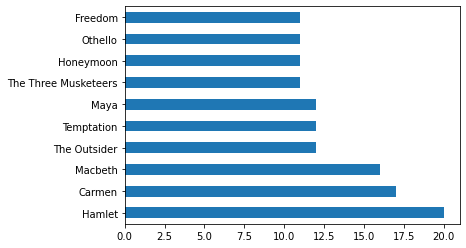

In [39]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [213]:
copy = movies.set_index('year').sort_index()
copy.loc['2000':].value_counts(subset='year')[:3]

year
2017    11474
2016     9440
2015     8702
dtype: int64

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

In [224]:
list_of_decades = list()
years = movies['year']
type(years)

def sort_by_decade(df):
    list_of_decades = df.sort_values()
    decades = list()
    replace = "0"
    for val in list_of_decades:
        string = str(val)
        decade = string[:-1] + replace
        #print(decade)
        decades.append(decade)
    return decades
        
decades = sort_by_decade(years)
copy = copy.reset_index()
copy['decades'] = decades
copy = copy.set_index(['decades', 'year'])
copy

title
decades year                                                   
1890    1894                                         Miss Jerry
        1898                                 The Startled Lover
        1899     Reproduction of the Corbett and Jeffries Fight
1900    1900  Pierrot's Problem, or How to Make a Fat Wife O...
        1900                               Family Troubles (II)
...                                                         ...
2020    2024                                           Avatar 4
        2024                                      The Dark Room
        2025                                           Avatar 5
        2026                           The Zero Century: Maetel
2110    2115                                          100 Years

[244914 rows x 1 columns]

<AxesSubplot:title={'center':'Films per decade'}, xlabel='decades', ylabel='frequency'>

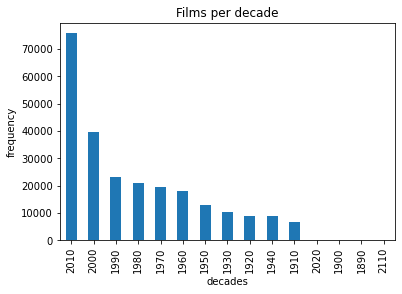

In [220]:
films_per_decade = copy.value_counts(subset='decades')

films_per_decade.plot(kind='bar', use_index=True, title="Films per decade", ylabel="frequency", sort_columns=True)
#films_per_decade

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [75]:
top_ten_char = cast.character.value_counts().head(15)
top_ten_char

Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Herself         6705
Minor Role      6279
Zombie          6264
Townsman        5874
Waiter          5430
Name: character, dtype: int64

In [80]:
cast[cast['character'] == "Herself"]['name'].value_counts().head(10)

Queen Elizabeth II           12
Joyce Brothers                9
Mar?a Luisa (V) Mart?n        9
Luisa Horga                   9
Margaret Thatcher             8
Hillary Clinton               8
Mar?a Isabel (III) Mart?n     6
Marta Berrocal                6
In?s J. Southern              6
Marilyn Monroe                6
Name: name, dtype: int64

In [81]:
cast[cast['character'] == "Himself"]['name'].value_counts().head(10)

Adolf Hitler          99
Richard Nixon         44
Ronald Reagan         41
John F. Kennedy       37
George W. Bush        25
Winston Churchill     24
Martin Luther King    23
Bill Clinton          22
Ron Jeremy            22
Benito Mussolini      21
Name: name, dtype: int64

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [98]:
cast[cast['character'].str.startswith("Zombie")]['n'].value_counts(dropna=False).head(10)

NaN     5511
28.0      45
12.0      45
26.0      41
14.0      41
39.0      40
25.0      40
27.0      39
31.0      38
29.0      37
Name: n, dtype: int64

In [99]:
cast[cast['character'].str.startswith("Police")]['n'].value_counts(dropna=False).head(10)

NaN     13576
13.0      434
10.0      422
14.0      410
15.0      409
12.0      403
11.0      402
9.0       389
18.0      369
19.0      367
Name: n, dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

<AxesSubplot:xlabel='year', ylabel='num_roles'>

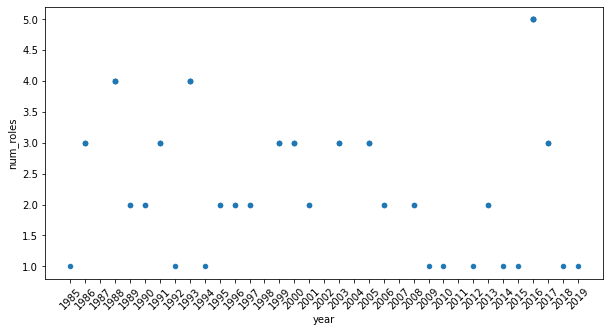

In [172]:
keanu_sorted = keanu_roles.set_index('year').sort_index()
keanu_sorted['num_roles'] = keanu_sorted.value_counts(subset='year')
keanu_sorted.reset_index().plot(kind='scatter', x='year', y='num_roles',figsize=(10, 5), xticks=range(1985, 2020),
                                rot=45)
#keanu_sorted.groupby('year')['num_roles'].max()
#keanu_sorted.plot?

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


<AxesSubplot:xlabel='year', ylabel='n'>

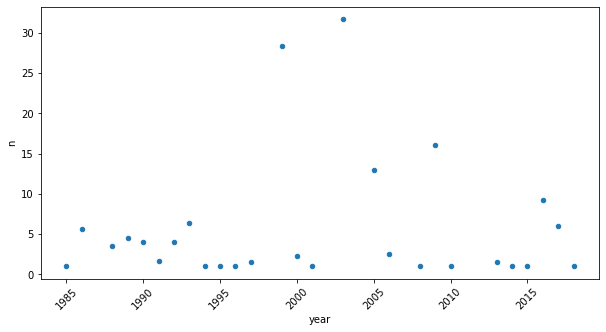

In [189]:
mean_of_role_val = keanu_sorted.groupby('year').mean()
mean_of_role_val.reset_index().plot(kind='scatter', x='year', y='n',figsize=(10, 5),
                                rot=45)

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

<AxesSubplot:xlabel='decade', ylabel='Number of Films'>

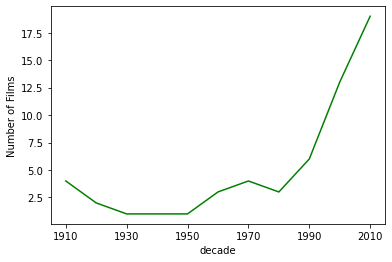

In [265]:
Hamlet_by_decade = movies[movies['title'].str.contains("Hamlet", case=False)]
Hamlet_by_decade = Hamlet_by_decade.sort_values(by='year')
Hamlet_by_decade

decade = sort_by_decade(Hamlet_by_decade['year'])
Hamlet_by_decade['decade'] = decade
Hamlet_by_decade = Hamlet_by_decade.set_index(['decade', 'year'])
Hamlet_by_decade = Hamlet_by_decade.value_counts(subset='decade')

Hamlet_by_decade = Hamlet_by_decade.reset_index().sort_values('decade').set_index('decade')
Hamlet_by_decade.plot(kind='line', use_index=True, ylabel='Number of Films', legend=False, color='green')

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [17]:
cast_sorted = cast.set_index('year').sort_index()
roles_1960s = cast_sorted.loc['1960':'1969']
lead_roles = roles_1960s[roles_1960s['n'] <= 10.0]
lead_roles
print("number of lead roles in 1960s was", len(lead_roles))

number of lead roles in 1960s was 86122


In [18]:
roles_2000s = cast_sorted.loc['2000':'2009']
leads_2000s = roles_2000s[roles_2000s['n'] <= 10.0]
print("number of lead roles in the 2000s was", len(leads_2000s))

number of lead roles in the 2000s was 204299


### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [170]:
frank_roles_by_year = cast_sorted[cast_sorted['name'].str.contains("Frank Oz", case=False)]
frank_roles_by_year

#df.drop(df[df['Age'] < 25].index, inplace = True)

dups = frank_roles_by_year.reset_index()[['year', 'title']]
dups['dups'] = dups.duplicated()
dup_roles = dups.drop(dups[dups['dups'] == False].index)
dup_roles.drop(columns='dups', inplace=True)

mult_roles = dup_roles[['year', 'title']].drop_duplicates()
mult_roles

,year,title
1,1979,The Muppet Movie
11,1981,The Great Muppet Caper
17,1981,An American Werewolf in London
19,1982,The Dark Crystal
24,1984,The Muppets Take Manhattan
32,1985,Follow That Bird
37,1992,The Muppet Christmas Carol
44,1996,Muppet Treasure Island
49,1999,Muppets from Space
54,1999,The Adventures of Elmo in Grouchland


### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [245]:
year_title_char = frank_roles_by_year.reset_index()[['year', 'title', 'character']]

year_title_char['dups'] = year_title_char.duplicated(subset='character')
#dup_char = year_title_char.drop(year_title_char[year_title_char['dups'] == False].index)
#dup_char.drop(columns='dups', inplace=True)

year_title_char.sort_values('character', inplace=True)
#year_title_char.drop(columns='dups',inplace=True)
chars = year_title_char['character'].value_counts()

#for index, value in s.items():
for index, value in chars.items():
    if(value >= 2):
        print(index)

Miss Piggy
Yoda
Animal
Cookie Monster
Sam the Eagle
Fozzie Bear
Bert
Grover


# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<AxesSubplot:>

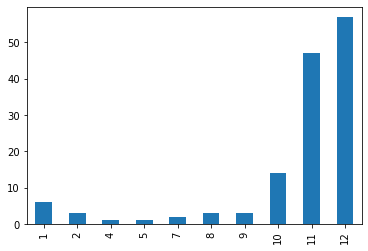

In [266]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<AxesSubplot:>

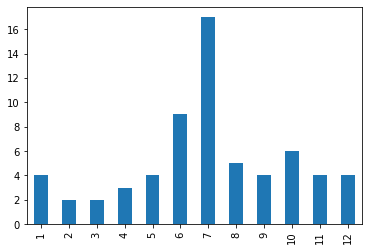

In [247]:
summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

<ipython-input-255-25f82eb9af48>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  summer.date.dt.week.value_counts().sort_index().plot(kind='bar')


,title,year,country,date
288,(500) Days of Summer,2009,USA,2009-08-07
6218,A Bad Summer for Tomatoes,2016,USA,2016-12-15
8300,A Horse for Summer,2015,USA,2015-01-06
11064,A Summer Place,1959,USA,1959-11-18
13025,Abby in the Summer,2014,USA,2014-05-06
...,...,...,...,...
422220,The Summer Girl,1916,USA,1916-08-14
422222,The Summerland: Blood of Virtue,2018,USA,2018-06-01
422223,The Summerset Sisters,1981,USA,2017-12-15
429527,The Wine of Summer,2013,USA,2015-10-06


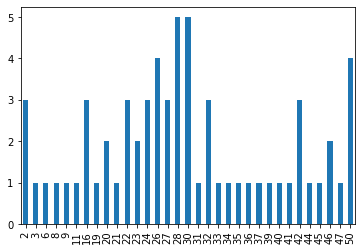

In [255]:
summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
summer.date.dt.week.value_counts().sort_index().plot(kind='bar')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [265]:
films_cast_release = cast.merge(release_dates) 
keanu_lead = films_cast_release[(films_cast_release['name'].str.contains("Keanu Reeves", case=False)) & (keanu_lead['country'] == 
                               'USA')]
keanu_lead = keanu_lead[keanu_lead['n'] <= 10.0]
keanu_lead.sort_values('date', inplace=True)
keanu_lead

,title,year,name,type,character,n,country,date
17989030,River's Edge,1986,Keanu Reeves,actor,Matt,2.0,USA,1987-05-08
16837127,The Night Before,1988,Keanu Reeves,actor,Winston Connelly,1.0,USA,1988-04-15
16483953,Permanent Record,1988,Keanu Reeves,actor,Chris Townsend,6.0,USA,1988-04-22
8395767,Bill & Ted's Excellent Adventure,1989,Keanu Reeves,actor,Ted,1.0,USA,1989-02-17
18601507,Dangerous Liaisons,1988,Keanu Reeves,actor,Chevalier Danceny,5.0,USA,1989-02-24
14475951,Parenthood,1989,Keanu Reeves,actor,Tod,8.0,USA,1989-05-26
16635217,I Love You to Death,1990,Keanu Reeves,actor,Marlon,6.0,USA,1990-04-06
6011799,Tune in Tomorrow...,1990,Keanu Reeves,actor,Martin Loader,2.0,USA,1990-11-02
11452680,Point Break,1991,Keanu Reeves,actor,Johnny Utah,2.0,USA,1991-07-12
2709676,Bill & Ted's Bogus Journey,1991,Keanu Reeves,actor,Ted,1.0,USA,1991-07-19


### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

<AxesSubplot:>

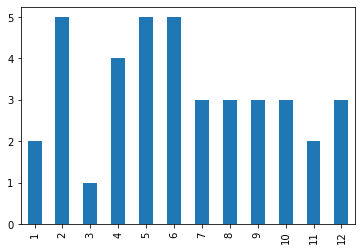

In [269]:
keanu_lead.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

<AxesSubplot:>

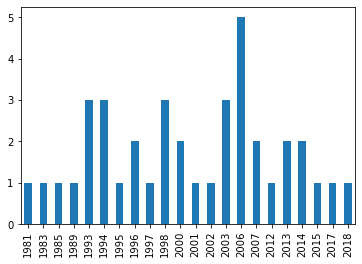

In [277]:
ian_mck_films = films_cast_release[(films_cast_release['name'].str.contains("Ian McKellen", case=False)) & 
                                   (films_cast_release['country'] == 'USA')]
ian_mck_films = ian_mck_films.sort_values('date')
ian_mck_films.date.dt.year.value_counts().sort_index().plot(kind='bar')